# Question - 2

In [234]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plot
import random
from mpl_toolkits import mplot3d
import matplotlib.axes as axes

### Generating The datasets

In [235]:
def rosenborck_function(x, y):
    return x**2 + 100*((y-x**2)**2)

def generate_points(n, t):
    '''
    We shall use this function to generate the points with random initialisation 
    as mentioned in the question. We shall take the points from the range ...
    [-10, 10]^2
    x is the 1st argument
    y is the 2nd argument
    '''
    training_set_x = []
    training_set_y = []
    for i in range(n):
        training_set_x += [[random.uniform(-t, t), random.uniform(-t, t)]]
        training_set_y += [rosenborck_function(training_set_x[i][0], training_set_x[i][1])]
    training_set_y = np.array(training_set_y)
    training_set_x = np.array(training_set_x)
    return training_set_x, training_set_y
data_points = 500
t = 2
training_set_x, training_set_y = generate_points(data_points, t)

In [236]:
pd.DataFrame(training_set_y)

,0
0,287.895203
1,36.364266
2,139.987962
3,22.084016
4,565.567775
...,...
495,14.347358
496,795.033539
497,1393.917681
498,80.193367


In [237]:
pd.DataFrame(training_set_x)

,0,1
0,-1.576055,0.794536
1,0.791714,0.029003
2,0.781454,1.791252
3,-0.475211,0.693353
4,-1.417492,-0.364656
...,...,...
495,-0.856123,1.101924
496,-1.212114,-1.347807
497,-1.477513,-1.547550
498,0.967989,1.827262


In [238]:
def plot_points(training_set_x, training_set_y):
    # fig = plot.figure()
    # ax = plot.axes(projection = '3d', )
    # ax.scatter3D([i[0] for i in training_set_x], [i[1] for i in training_set_x], training_set_y, color = 'black')
    z = []
    for i in range(len(training_set_x)):
        for j in range(len(training_set_x)):
            temp_dict = dict()
            temp_dict['x'] = training_set_x[i][0]
            temp_dict['y'] = training_set_x[j][1]
            temp_dict['function'] = rosenborck_function(training_set_x[i][0], training_set_x[j][1])
            z += [temp_dict]
    return z
temp = pd.DataFrame(plot_points(training_set_x, training_set_y))
temp

,x,y,function
0,-1.576055,0.794536,287.895203
1,-1.576055,0.029003,605.159346
2,-1.576055,1.791252,50.466809
3,-1.576055,0.693353,323.107123
4,-1.576055,-0.364656,813.938693
...,...,...,...
249995,-1.025584,1.101924,1.302845
249996,-1.025584,-1.347807,576.873807
249997,-1.025584,-1.547550,676.725366
249998,-1.025584,1.827262,61.182640


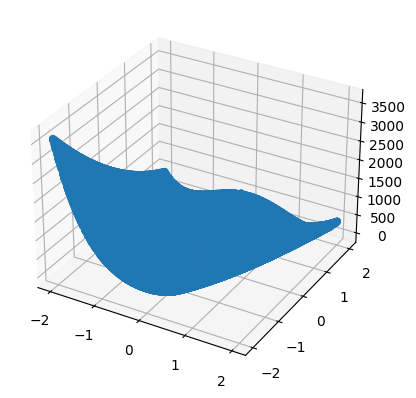

In [239]:
fig = plot.figure()
ax = plot.axes(projection='3d',)
plot.plot(0, 0, 0, 'ro')
ax.scatter3D(list(temp['x']), list(temp['y']), list(temp['function']))
plot.savefig('./data.png')
plot.show()

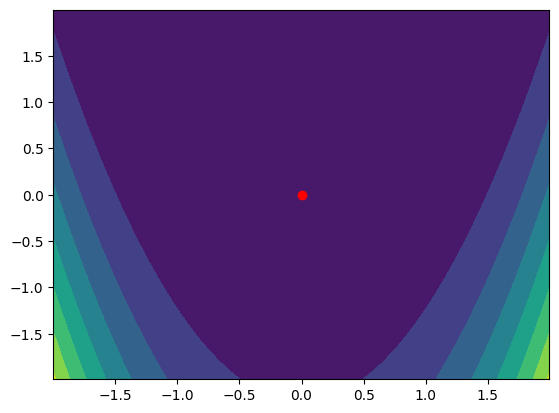

In [240]:
fig = plot.figure()
plot.plot(0, 0, 0, 'ro')
plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
# plot.savefig('./data.png')
plot.show()

### Question - 2.1 - Optimising the function using gradient descent
Notes: 
1. To avoid overflow, there has been a max limit set up on the inital parameters. 
2. Even in that case, we can possibly encounter some cases of overflows. Hence, the random initialisation has been used to ease testing. In case you notice overflow messages, like the one in ```/q2/overflow.png```, re-run the cell.
3. Initial Parameters:
   1. Loss for convergence - stored in variable ```tolerence``` = 0.0001
   2. Learning Rate - stored in variable ```learning_rate``` = 0.02
   3. Max Epochs - Stored in variable ```epochs``` = 10000

#### Initial Parameters

In [268]:
epochs = 10000
learning_rate = 0.002 # Is kind of safe learning rate
max_limit_1 = 1
w_init = np.array([random.uniform(-1*max_limit_1, max_limit_1), random.uniform(-1*max_limit_1, max_limit_1)])
tolerence = 0.0001

In [269]:
def gradient_function(parameters):
    x = parameters[0]
    y = parameters[1]
    dx = 2*x - 400*(x*(y - x**2))
    dy = 200*(y - x**2)
    return np.array([dx, dy])
def gradient_descent_step(weight_now, learning_rate, tolerence):
    gradient = gradient_function(weight_now)
    # print(gradient)
    weight_new = weight_now - learning_rate*gradient
    loss = rosenborck_function(weight_new[0], weight_new[1])
    if(loss < tolerence):
        print("Loss: ", loss)
        return weight_new, 0, loss
    return weight_new, 1, loss


In [270]:
w_now = w_init
print("Initial Parameters:")
print(w_init)
seq_1 = []
loss_seq_1 = []
for i in range(epochs):
    seq_1 += [w_now]
    w_now, cont, loss = gradient_descent_step(w_now, learning_rate=learning_rate, tolerence=tolerence)
    loss_seq_1 += [loss]
    if(not cont):
        print("Epochs: ", i+1)
        break
if(cont):
    print("Epochs", epochs)
print("Final Paramters")
print(w_now)

Initial Parameters:
[0.77170595 0.94477644]
Loss:  9.96210772082418e-05
Epochs:  1544
Final Paramters
[0.00998102 0.00010165]


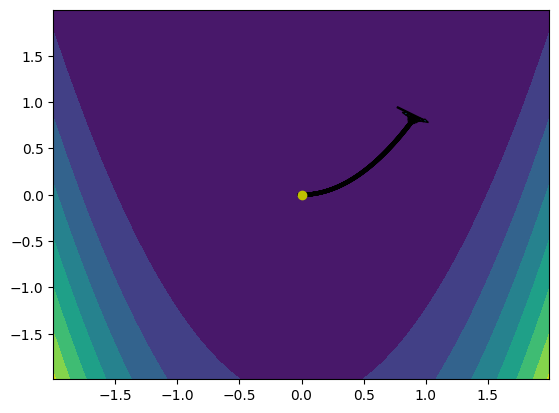

In [271]:
ground_truth = [0, 0]
seq_1 = pd.DataFrame(seq_1)
def contour_plot(seq_1):
    fig = plot.figure()
    ax = plot.axes()
    x = list(seq_1[0])
    y = list(seq_1[1])
    z = loss_seq_1
    plot.plot(ground_truth[0], ground_truth[1], 'yo')
    # [x, y] = np.meshgrid(x, y)
    # print(y)
    # z = objective_loss_function([x, y], training_set_x, training_set_y, 400)
    # z = (x-2)**2 + (y÷3)**2
    # print(x.shape)
    plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
    for i in range(len(seq_1)-1):
        plot.arrow(x=x[i], y =y[i], dx = x[i+1] - x[i], dy = y[i+1] - y[i], width=0.01)
    # plot.tight_layout()
    plot.show()
contour_plot(seq_1)

### Question - 2.2 - Optimising the Rosenbrock function using momentum update
Notes:
1. We have used the same initialisation vector we have previously used for the normal gradient descent method. 

In [272]:
epochs = 10000
learning_rate = 0.001
beta = 0.8
tolerence = 0.001
max_limit_2 = 1
w_init = w_init
mom_init = np.array([0, 0])

In [273]:
def polyak_update(w_now, mom_now, learning_rate, beta, tolerence):
    '''
    For a given value of weight, momentum, it does a polyak momentum
    and returns the new weight, momentum, and loss
    '''
    mom_new = beta*mom_now + learning_rate*gradient_function(w_now)
    w_new = w_now - mom_new
    loss = rosenborck_function(w_new[0], w_new[1])
    if(loss < tolerence):
        print("Loss: ")
        print(loss)
        return w_new, mom_new, loss, 0
    return w_new, mom_new, loss, 1

In [274]:
seq_2 = []
loss_seq_2 = []
w_now = w_init
mom_now = mom_init
print("Initial Paramters: ")
print(w_init)
for i in range(epochs):
    seq_2 += [w_now]
    w_now, mom_now, loss, cont = polyak_update(w_now, mom_now, learning_rate, beta, tolerence)
    loss_seq_2 += [loss]
    if(not cont):
        print("Epochs:", i+1)
        break
if(cont):
    print("Epochs:", loss)
print("Final Parameters:")
print(w_now)

Initial Paramters: 
[0.77170595 0.94477644]
Loss: 
0.0009909809314183739
Epochs: 469
Final Parameters:
[0.03147927 0.00101008]


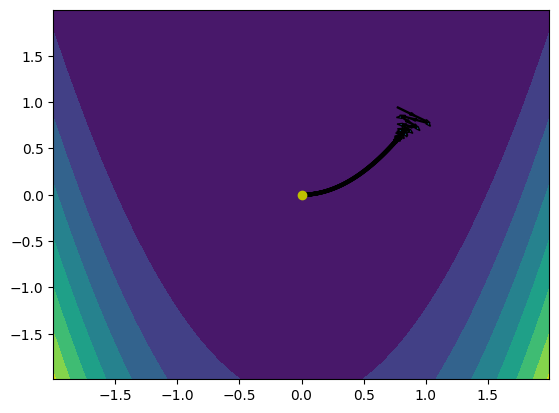

In [275]:
ground_truth = [0, 0]
seq_2 = pd.DataFrame(seq_2)
def contour_plot(seq_1):
    fig = plot.figure()
    ax = plot.axes()
    x = list(seq_1[0])
    y = list(seq_1[1])
    z = loss_seq_2
    plot.plot(ground_truth[0], ground_truth[1], 'yo')
    # [x, y] = np.meshgrid(x, y)
    # print(y)
    # z = objective_loss_function([x, y], training_set_x, training_set_y, 400)
    # z = (x-2)**2 + (y÷3)**2
    # print(x.shape)
    plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
    for i in range(len(seq_1)-1):
        plot.arrow(x=x[i], y =y[i], dx = x[i+1] - x[i], dy = y[i+1] - y[i], width=0.01)
    # plot.tight_layout()
    plot.show()
contour_plot(seq_2)